In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import numpy as np
import numpy.linalg as la

In [7]:
def add_relative_to_current_source_file_path_to_sys_path(relpath):
    import os, sys, inspect
    path = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile(inspect.currentframe()))[0],relpath)))
    if path not in sys.path:
        sys.path.insert(0,path)

add_relative_to_current_source_file_path_to_sys_path("../../shims/toric")   

import toric
import toric.samples
import toric.shims

#
# Helper functions for the toric libary
#

def vector3_to_str(v):
    return "(%.2f, %.2f, %.2f)" % (v.x(), v.y(), v.z())

def quaternion_to_str(q):
    return "(w,x,y,z): (%.2f, %.2f, %.2f, %.2f)" % (q.w(), q.x(), q.y(), q.z())

def vector3_to_np3(v):
    return np.array([v.x(),v.y(),v.z()])

def np3_to_vector3(v):
    return toric.Vector3(v[0],v[1],v[2])

def slerp(p0, p1, t):
        omega = np.arccos(np.dot(p0/np.linalg.norm(p0), p1/np.linalg.norm(p1)))
        so = np.sin(omega)
        return np.sin((1.0-t)*omega) / so * p0 + np.sin(t*omega)/so * p1

def drawSetup(fudgeX=10, fudgeY_pos=6,fudgeY_neg=8):
    pylab.rcParams['figure.figsize'] = 8, 8

    plt.axes().set_aspect('equal')
    fig = plt.gcf()
    
    # Set up plot size
    plt.axes().set_xlim((np.min([PA.x(), PB.x()])-fudgeX,np.max([PA.x(), PB.x()])+fudgeX))
    plt.axes().set_ylim((np.min([PA.y(), PB.y()])-fudgeY_neg,np.max([PA.y(), PB.y()])+fudgeY_pos))

    # Draw People Positions
    plt.scatter([PA.x(), PB.x()],[PA.y(), PB.y()],c="red",linewidths=0)
    line_AB = plt.Line2D([PA.x(), PB.x()],[PA.y(), PB.y()], c="black",alpha=0.3)
    fig.gca().add_artist(line_AB)

    # Draw Circles    
    circle_PA=plt.Circle((PA.x(),PA.y()),min_dist,color='g',alpha=0.5)
    circle_PB=plt.Circle((PB.x(),PB.y()),min_dist,color='g',alpha=0.5)
    
    fig.gca().add_artist(circle_PA)
    fig.gca().add_artist(circle_PB)

    plt.annotate(s="A", xy=(PA.x(),PA.y()),xytext=(3,4),textcoords="offset points")
    plt.annotate(s="B", xy=(PB.x(),PB.y()),xytext=(3,4),textcoords="offset points")
    
    # Draw Camera positions
    plt.scatter([C.x()],[C.y()],c="blue",linewidths=0)
    plt.annotate(s="C", xy=(C.x(), C.y()),xytext=(3,4),textcoords="offset points")

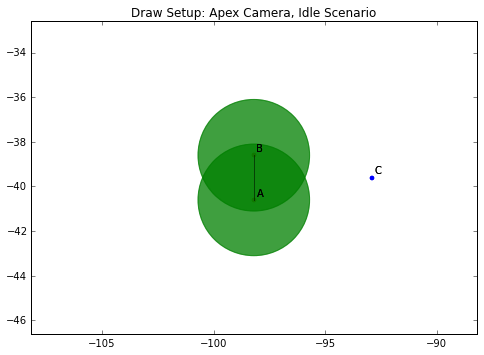

In [15]:
min_dist = 2.5 # Unity x,y,x -> C++ z,x,y
PA = toric.Vector3(-98.2,-40.6,1.6)     # person A position
PB = toric.Vector3(-98.2,-38.6,1.6)     # person B position
C = toric.Vector3(-92.9,-39.6,2.1)      # camera position

drawSetup(fudgeY_neg=2)
plt.title("Draw Setup: Apex Camera, Idle Scenario")

Ct = toric.Toric3_FromWorldPosition(C, PA, PB)

drawSetup(fudgeY_neg=6)

In [16]:
SA = toric.Vector2(0.1,0.2)
SB = toric.Vector2(-0.1,0.2)

fovX = toric.RadianPi(1.551404)
fovY = toric.RadianPi(0.8726646)

rotation = toric.Toric3_ComputeOrientationForTwoTargets(C, SA, SB, PA, PB, fovX, fovY)

print quaternion_to_str(rotation)
print rotation.xAxis()
print rotation.yAxis()
print rotation.zAxis()

(w,x,y,z): (-0.00, 0.71, -0.71, 0.00)
(0.00, -1.00, -0.00)
(-1.00, 0.00, -0.00)
(0.00, 0.00, -1.00)
